# Example code to apply the modular splicing model

Example test variants come from ClinVar BRCA1 variants

## Splicing delta PSI prediction

In [1]:
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_all_table

from mmsplice.utils import max_varEff

Using TensorFlow backend.
/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/concise/utils/plot.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/concise/utils/plot.py:116: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)
W0708 23:30:06.558259 140231116048128 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is d

In [2]:
import pkg_resources
assert pkg_resources.get_distribution("mmsplice").version == '0.2.7'
pkg_resources.get_distribution("mmsplice").version

'0.2.7'

In [3]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'

In [4]:
dl = SplicingVCFDataloader(gtf, fasta, vcf,
                          split_seq=False,encode=False, overhang=(100,100))

In [5]:
model = MMSplice()

W0708 23:30:10.536255 140231116048128 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0708 23:30:10.539473 140231116048128 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0708 23:30:10.550059 140231116048128 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 23:30:10.555004 140231116048128 deprecation_wrapper.py:119] From /home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site

In [6]:
predictions = predict_all_table(model, dl, assembly=True, pathogenicity=True,
                                splicing_efficiency=True, split_seq=False)

0it [00:00, ?it/s]/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/mmsplice/mmsplice.py:162: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/home/muhammedhasan/Projects/MMSplice/old-env/lib/python3.7/site-packages/mmsplice/mmsplice.py:164: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
5it [00:17,  3.16s/it]


In [7]:
def exon_annotation_mapping(exon):
    loc = exon.split('_')
    start = int(loc[1]) - 1
    loc[1] = str(start)
    return '%s:%s-%s' % tuple(loc)

In [8]:
predictions['exons'] = predictions['exons'].map(exon_annotation_mapping)
predictions = predictions.set_index(['ID', 'exons'])

In [9]:
import pandas as pd
# run notebooks example notebook file to obtain this file
df = pd.read_csv('../notebooks/pred.csv')
df = df.set_index(['ID', 'exons'])

In [10]:
df.head()

delta_logit_psi  \
ID                          exons                                     
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-        -0.307460   
                            17:41196312-41197819:-        -0.155897   
                            17:41196821-41197819:-        -0.803974   
                            17:41197579-41197819:-        -0.058155   
                            17:41197645-41197819:-         0.354611   

                                                    ref_acceptorIntron  \
ID                          exons                                        
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-           -2.924059   
                            17:41196312-41197819:-           -2.924059   
                            17:41196821-41197819:-           -2.924059   
                            17:41197579-41197819:-           -2.924059   
                            17:41197645-41197819:-           -2.924059   

                                                    ref_acceptor  ref_exon  \
ID                          exons                                            
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-      5.068939 -4.191132   
                            17:41196312-41197819:-      5.068939 -4.190762   
                            17:41196821-41197819:-      5.068939 -3.869307   
                            17:41197579-41197819:-      5.068939 -3.507481   
                            17:41197645-41197819:-      5.068939 -3.694287   

                                                    ref_donor  \
ID                          exons                               
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-  -3.197544   
                            17:41196312-41197819:-  -2.977995   
                            17:41196821-41197819:-  -2.182720   
                            17:41197579-41197819:-  -3.032851   
                            17:41197645-41197819:-  -3.278372   

                                                    ref_donorIntron  \
ID                          exons                                     
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-         0.105083   
                            17:41196312-41197819:-         0.105083   
                            17:41196821-41197819:-         0.105083   
                            17:41197579-41197819:-         0.105083   
                            17:41197645-41197819:-         0.105083   

                                                    alt_acceptorIntron  \
ID                          exons                                        
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-           -2.924059   
                            17:41196312-41197819:-           -2.924059   
                            17:41196821-41197819:-           -2.924059   
                            17:41197579-41197819:-           -2.924059   
                            17:41197645-41197819:-           -2.924059   

                                                    alt_acceptor  alt_exon  \
ID                          exons                                            
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-      5.068939 -4.212151   
                            17:41196312-41197819:-      5.068939 -4.208668   
                            17:41196821-41197819:-      5.068939 -3.857884   
                            17:41197579-41197819:-      5.068939 -3.546150   
                            17:41197645-41197819:-      5.068939 -3.615741   

                                                    alt_donor  \
ID                          exons                               
17:41197805:ACATCTGCC:['A'] 17:41196311-41197819:-  -3.584379   
                            17:41196312-41197819:-  -3.166318   
                            17:41196821-41197819:-  -3.268380   
                            17:41197579-41197819:-  -3.067249   
                            17:41197645-41197819:-  -2.895855   

            

In [11]:
df_join = predictions.join(df, how='inner')[['mmsplice_dlogitPsi', 'delta_logit_psi']]

In [12]:
df_join.head()

,,mmsplice_dlogitPsi,delta_logit_psi
ID,exons,,
17:41222946:AATTCTTCTGGGGTCAGGCC:['A'],17:41222944-41223255:-,-0.922667,-0.922667
17:41256969:G:['A'],17:41256884-41256973:-,-0.313102,-0.313102
17:41203152:G:['C'],17:41203079-41203134:-,0.198023,0.197718
17:41228504:C:['T'],17:41228504-41228628:-,-4.356666,-4.356658
17:41219706:C:['G'],17:41219290-41219712:-,0.057890,0.230223


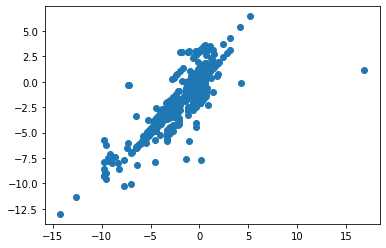

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df_join['mmsplice_dlogitPsi'], df_join['delta_logit_psi'])

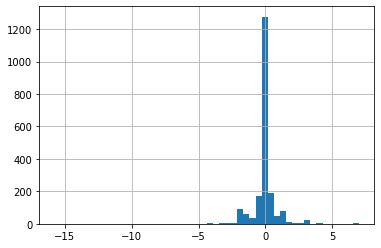

In [14]:
(df_join['delta_logit_psi'] - df_join['mmsplice_dlogitPsi']).hist(bins=50)